  x	   y(Эйлер)	   y(Рунге–Кутта)
0.00	 1.100000	 1.100000
0.20	 1.016970	 1.057908
0.40	 0.999225	 1.094152
0.60	 1.040502	 1.192675
0.80	 1.125877	 1.327631


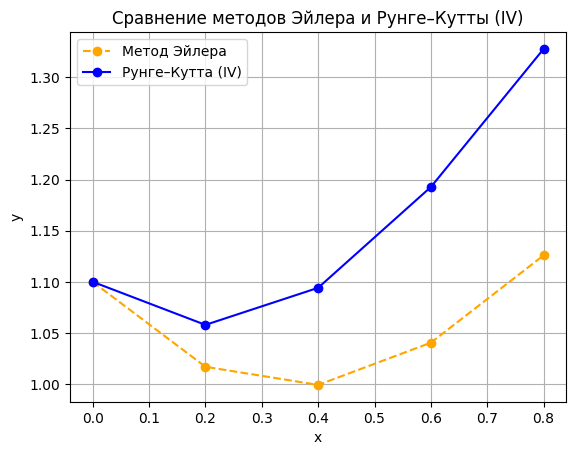

In [1]:
from math import cos, exp
import matplotlib.pyplot as plt

# ==== Исходные данные ====
a, b = 0.0, 0.8
y0 = 1.1
h = 0.2

# ==== Правая часть уравнения ====
def f(x, y):
    return y * cos(x) - exp(-2 * x) * (2 + 3 * cos(x)) / (3 * y)

# ==== Метод Эйлера ====
x_euler = [a]
y_euler = [y0]
x = a
y = y0
while x < b - 1e-10:
    y = y + h * f(x, y)
    x += h
    x_euler.append(round(x, 2))
    y_euler.append(y)

# ==== Метод Рунге–Кутты 4-го порядка ====
x_rk = [a]
y_rk = [y0]
x = a
y = y0
while x < b - 1e-10:
    k1 = f(x, y)
    k2 = f(x + h / 2, y + h * k1 / 2)
    k3 = f(x + h / 2, y + h * k2 / 2)
    k4 = f(x + h,   y + h * k3)
    y += h * (k1 + 2 * k2 + 2 * k3 + k4) / 6
    x += h
    x_rk.append(round(x, 2))
    y_rk.append(y)

# ==== Вывод таблицы сравнения ====
print("  x\t   y(Эйлер)\t   y(Рунге–Кутта)")
for i in range(len(x_rk)):
    print(f"{x_rk[i]:.2f}\t {y_euler[i]:.6f}\t {y_rk[i]:.6f}")

# ==== График ====
plt.plot(x_euler, y_euler, 'o--', label='Метод Эйлера', color='orange')
plt.plot(x_rk, y_rk, 'o-', label='Рунге–Кутта (IV)', color='blue')
plt.xlabel("x")
plt.ylabel("y")
plt.title("Сравнение методов Эйлера и Рунге–Кутты (IV)")
plt.grid(True)
plt.legend()
plt.show()